### For this project we are to come up with a pricing model that can effectively predict the price of used cars and can help the business in making profitable decisions.

### There are so many independent variables while the target variable is the pricing

### Importing Required Libraries

In [101]:
import pandas as pd # Libraries for reading and manipulating data
import numpy as np
import matplotlib.pyplot as plt # Libraries for data visualization
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

pd.set_option("display.max_columns", None) # To remove limit for the number of displayed columns

pd.set_option("display.max_rows", 200) # To set the limit for the number of displayed rows

from sklearn.model_selection import train_test_split # To split the data into training and testing sets

from sklearn.linear_model import LinearRegression, Ridge, Lasso # To build linear regression model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To check for model performance

from sklearn.preprocessing import StandardScaler # To scale data for model building


### Loading the dataset

In [102]:
# Loading the dataset

path = "used_cars_data-1.csv"

data = pd.read_csv(path)

data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [103]:
# Checking from the data shape, it has 7253 rows and 14 columns

data.shape

(7253, 14)

In [104]:
# Showing number of rows and columns

print(f' This dataset has {data.shape[0]} rows and {data.shape[1]} columns')

 This dataset has 7253 rows and 14 columns


In [105]:
# Viewing the data sample

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [106]:
# Checking the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


### Observations from the above dataset

#### 1. There are more missing values in the data
#### 2. The variables mileage, engine,power columns are represented as objects
#### 3. Seats should be whole numbers instead of floats
#### 4. The null values have to be dropped in order to prevent model bias

##### These observations would be dealt with in order to forge ahead with building a good performing model

In [107]:
# Creating a copy of the data
df = data.copy()
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [108]:
# Dropping the serial number because it does not add any value in the analysis

df.drop("S.No.", axis = 1, inplace = True)

In [109]:
# checking for duplicate values

df.duplicated().sum()

1

In [110]:
# drop the duplicates

df.drop_duplicates(inplace = True)

In [111]:
# reset the index

df.reset_index(drop = True, inplace = True)

In [112]:
# checking statistical summary of the data

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7252,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7206,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7077,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations from the statistical summary of the dataset

#### 1. The most used car brand in India is Mahinrdra XUV500 W8 2WD
#### 2. Diesel powered cars are the most used in India
#### 3. The highest kilometer driven by a car is 6500000.0, which is way higher than the mean of 58699.9869

In [113]:
# Removing the units from mileage, Engine and Power columns

df["Mileage"] = df["Mileage"].replace("\D", "", regex = True)
df["Engine"] = df["Engine"].replace("\D", "", regex = True)
df["Power"] = df["Power"].replace("\D", "", regex = True)

In [114]:
# Inputting the units on the column header
df.columns = ['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type',
             'Mileage (km/kg)', 'Engine (CC)', 'Power (bhp)','Seats','New_Price','Price']
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [115]:
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266,998,5816,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967,1582,1262,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182,1199,887,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077,1248,8876,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152,1968,1408,5.0,53.14,17.74


In [116]:
# Checking for missing values

data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [117]:
# Drop null values in the target column

df.dropna(subset = ['price'],inplace = True)

In [118]:
# Drop null values in the Mileage, Engine and Power column

df.dropna(subset = ['mileage_(km/kg)'],inplace = True)
df.dropna(subset = ['engine_(cc)'],inplace = True)
df.dropna(subset = ['power_(bhp)'],inplace = True)
df.dropna(subset= ['seats'], inplace=True)

In [119]:
df.isnull().sum() # check sum of null values

name                 0
location             0
year                 0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
mileage_(km/kg)      0
engine_(cc)          0
power_(bhp)          0
seats                0
new_price            0
price                0
dtype: int64

In [120]:
# Converting the variables to appropriate types

df['mileage_(km/kg)'] = df['mileage_(km/kg)'].astype(float) # convert to float type
df['engine_(cc)'] = df['engine_(cc)'].astype(int) # convert to integer type
df['power_(bhp)'] = df['power_(bhp)'].astype(float) # convert to integer type
df['seats'] = df['seats'].astype(int) # convert to integer type
df['year'] = df['year'].astype(str) # convert to integer type

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5872 non-null   object 
 1   location           5872 non-null   object 
 2   year               5872 non-null   object 
 3   kilometers_driven  5872 non-null   int64  
 4   fuel_type          5872 non-null   object 
 5   transmission       5872 non-null   object 
 6   owner_type         5872 non-null   object 
 7   mileage_(km/kg)    5872 non-null   float64
 8   engine_(cc)        5872 non-null   int32  
 9   power_(bhp)        5872 non-null   float64
 10  seats              5872 non-null   int32  
 11  new_price          5872 non-null   float64
 12  price              5872 non-null   float64
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 596.4+ KB


In [122]:
# Treating the mileage column which has 0 as values and replacing them with nan and filling with the median
df['mileage_(km/kg)'].replace(0, value = np.nan, inplace = True)

In [123]:
df['mileage_(km/kg)'].fillna(df['mileage_(km/kg)'].median(), inplace = True)

In [124]:
# There are 1812 unique names of car, we will drop it as it is of no use to our model

del df['name']

In [125]:
# Rechecking

df.head()

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Mumbai,2010,72000,CNG,Manual,First,266.0,998,5816.0,5,5.51,1.75
1,Pune,2015,41000,Diesel,Manual,First,1967.0,1582,1262.0,5,16.06,12.50
2,Chennai,2011,46000,Petrol,Manual,First,182.0,1199,887.0,5,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,2077.0,1248,8876.0,7,11.27,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,1968,1408.0,5,53.14,17.74


In [126]:
df.shape

(5872, 12)

In [127]:
# Rechecking

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,5872,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5872,22,2014,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers_driven,5872.0,NaN,NaN,NaN,58316.999149,92169.410006,171.0,33422.5,52609.0,72402.75,6500000.0
fuel_type,5872,4,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,5872,2,Manual,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner_type,5872,4,First,4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_(km/kg),5872.0,NaN,NaN,NaN,869.784571,860.13769,64.0,176.0,231.0,1701.0,3354.0
engine_(cc),5872.0,NaN,NaN,NaN,1625.745572,601.641783,624.0,1198.0,1495.5,1991.0,5998.0
power_(bhp),5872.0,NaN,NaN,NaN,2741.920811,5010.890119,35.0,140.0,838.0,1685.0,108495.0
seats,5872.0,NaN,NaN,NaN,5.283719,0.805081,2.0,5.0,5.0,5.0,10.0


In [128]:
#Checking for cars with zero mileage
df[df['mileage_(km/kg)']==0]

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price


### Exploratory Data Analysis

#### Univariate Analysis

<Figure size 1280x960 with 0 Axes>

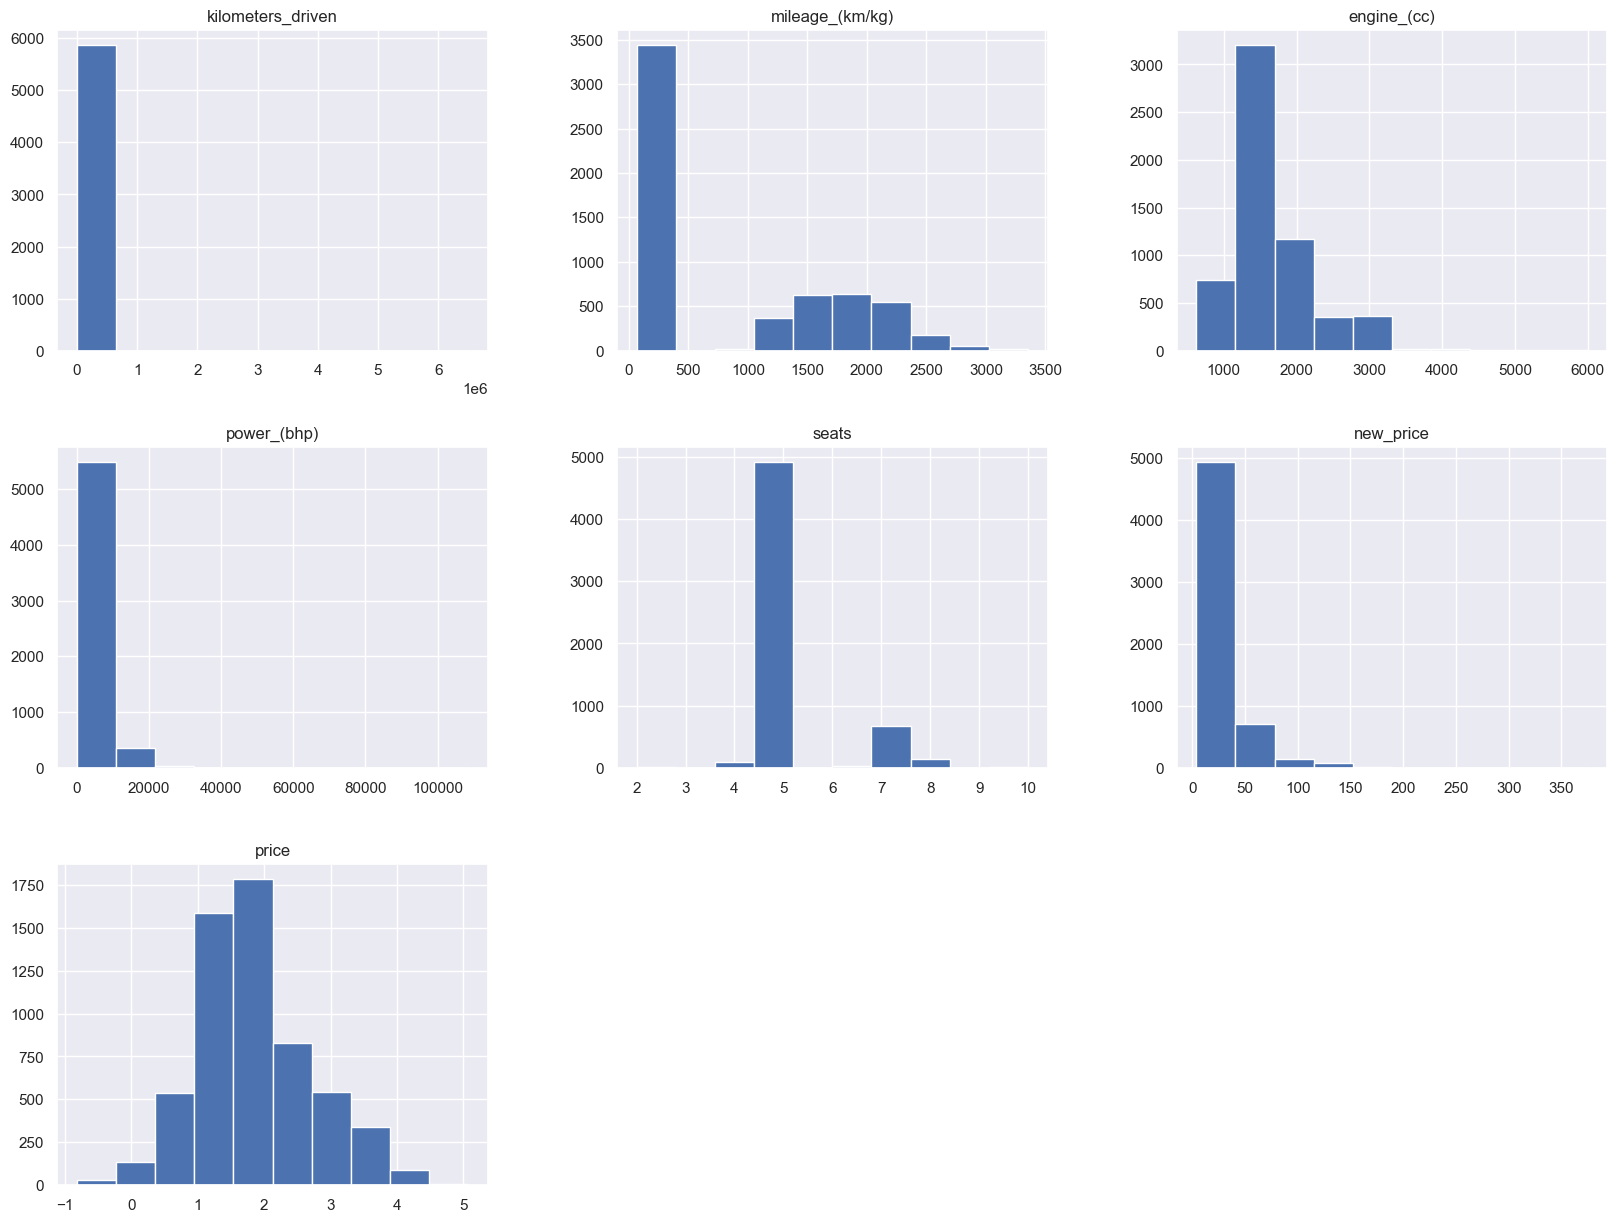

In [140]:
# To check for the data distribution

plt.figure(dpi = 200)
df.hist(figsize = (20, 15))
plt.show()

#### Manual transmission cars are the most used

#### Diesel is the most used fuel type for the cars

### The target variable - 'price' distribution is right skewed

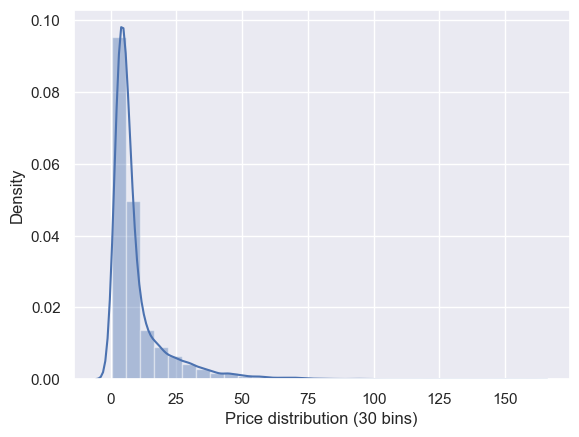

In [133]:
sns.distplot(df['price'], bins=30, kde=True, axlabel='Price distribution (30 bins)')
plt.show()

In [134]:
mean = df['price'].mean()
mode = df['price'].mode()
median = df['price'].median()

print(f'Mean for price is {(mean)}')
print(f'Median for price is {median}')
print(f'Mode for price is {mode}')

Mean for price is 9.603918596730246
Median for price is 5.75
Mode for price is 0    4.5
Name: price, dtype: float64


In [135]:
#check to see if the target has zero value

df[df['price'] == 0]

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price


In [136]:
## log the price

df['price'] = np.log(df['price'])

In [137]:
# Rechecking for the log price
df.head()

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Mumbai,2010,72000,CNG,Manual,First,266.0,998,5816.0,5,5.51,0.559616
1,Pune,2015,41000,Diesel,Manual,First,1967.0,1582,1262.0,5,16.06,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,182.0,1199,887.0,5,8.61,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,2077.0,1248,8876.0,7,11.27,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,1968,1408.0,5,53.14,2.875822


### Bivariate Analysis

<AxesSubplot: >

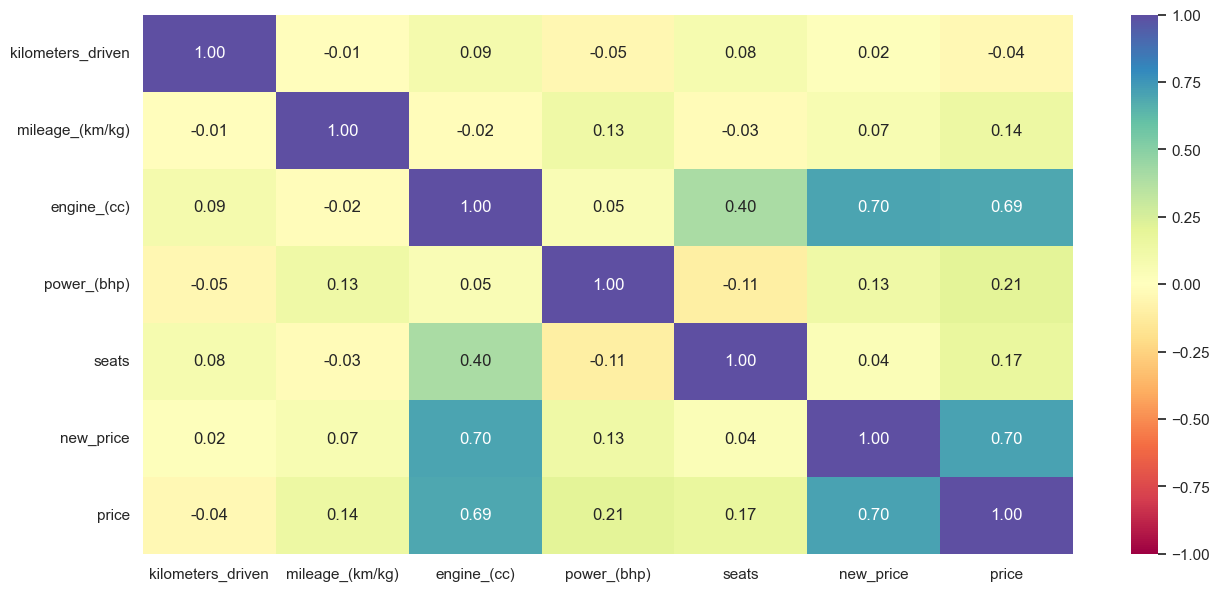

In [144]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

#### ***We can see that engine and new price are highly correlated to the price

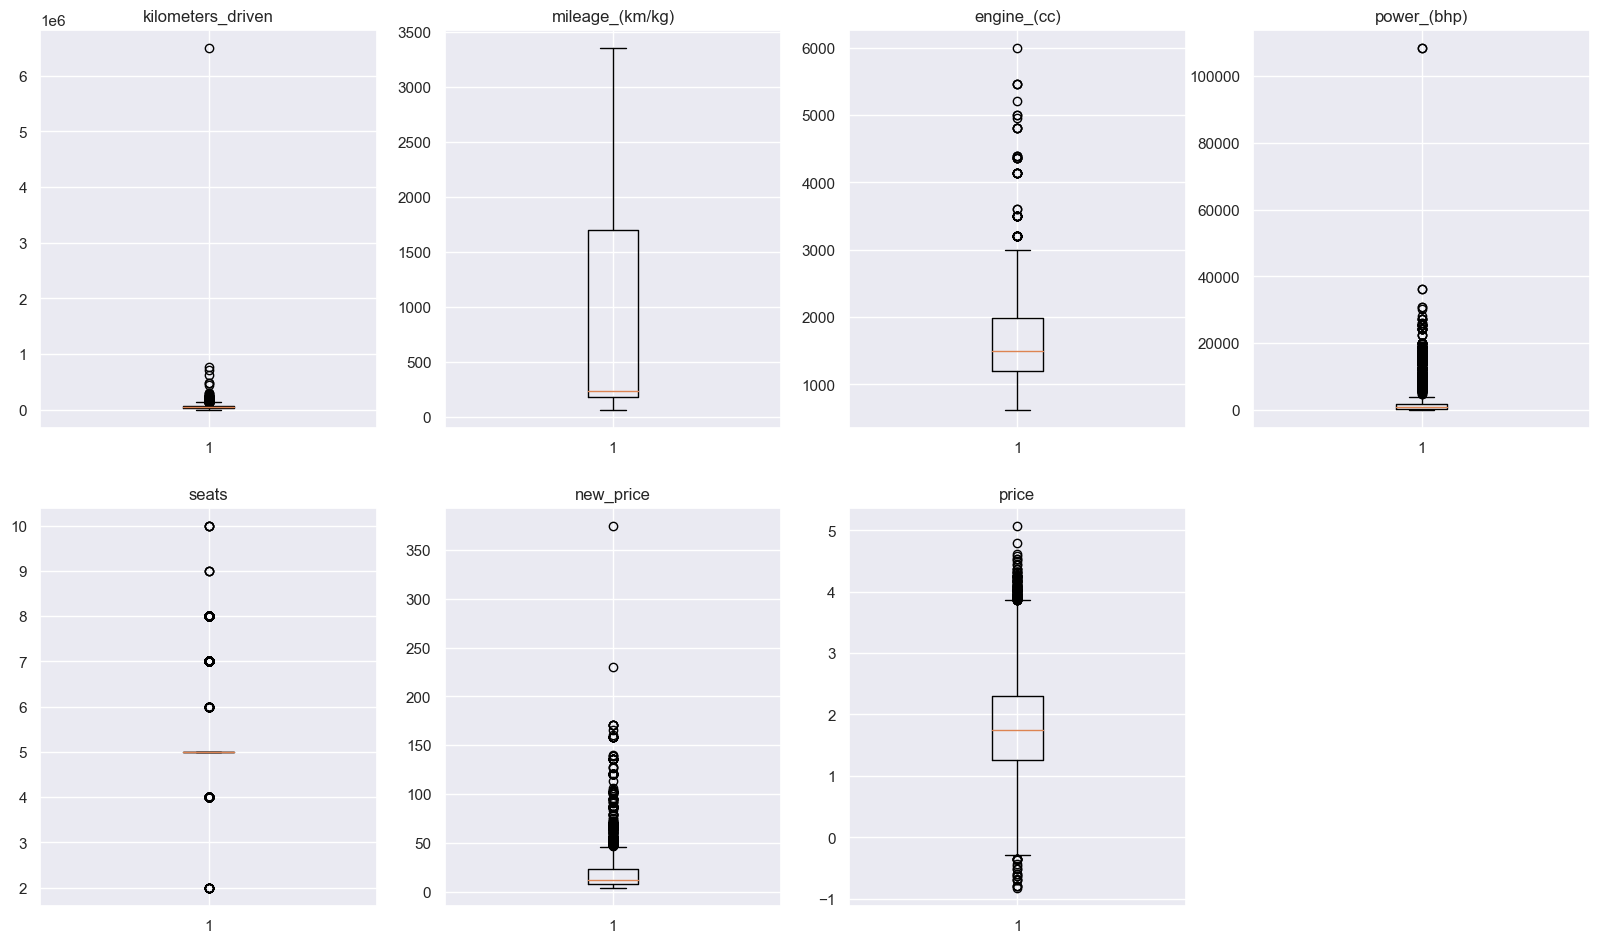

In [143]:
# check for outliers in the numerical column
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5,4, i +1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

### From the above plots we can see that there are so many outliers in the numercial columns and our target, this can be treated by clipping the values to the minimum and maximum as shown from the box

### Outlier Detection and Treatment

In [146]:
# clipping values to minimum and maximum

l1 = [-4, 11000, 0.4 , 40000]

# use np.clip function

np.clip(l1,0.4,11000)

array([4.0e-01, 1.1e+04, 4.0e-01, 1.1e+04])

In [147]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [149]:
# Treating the outliers

df = treat_outliers_all(df, num_cols)

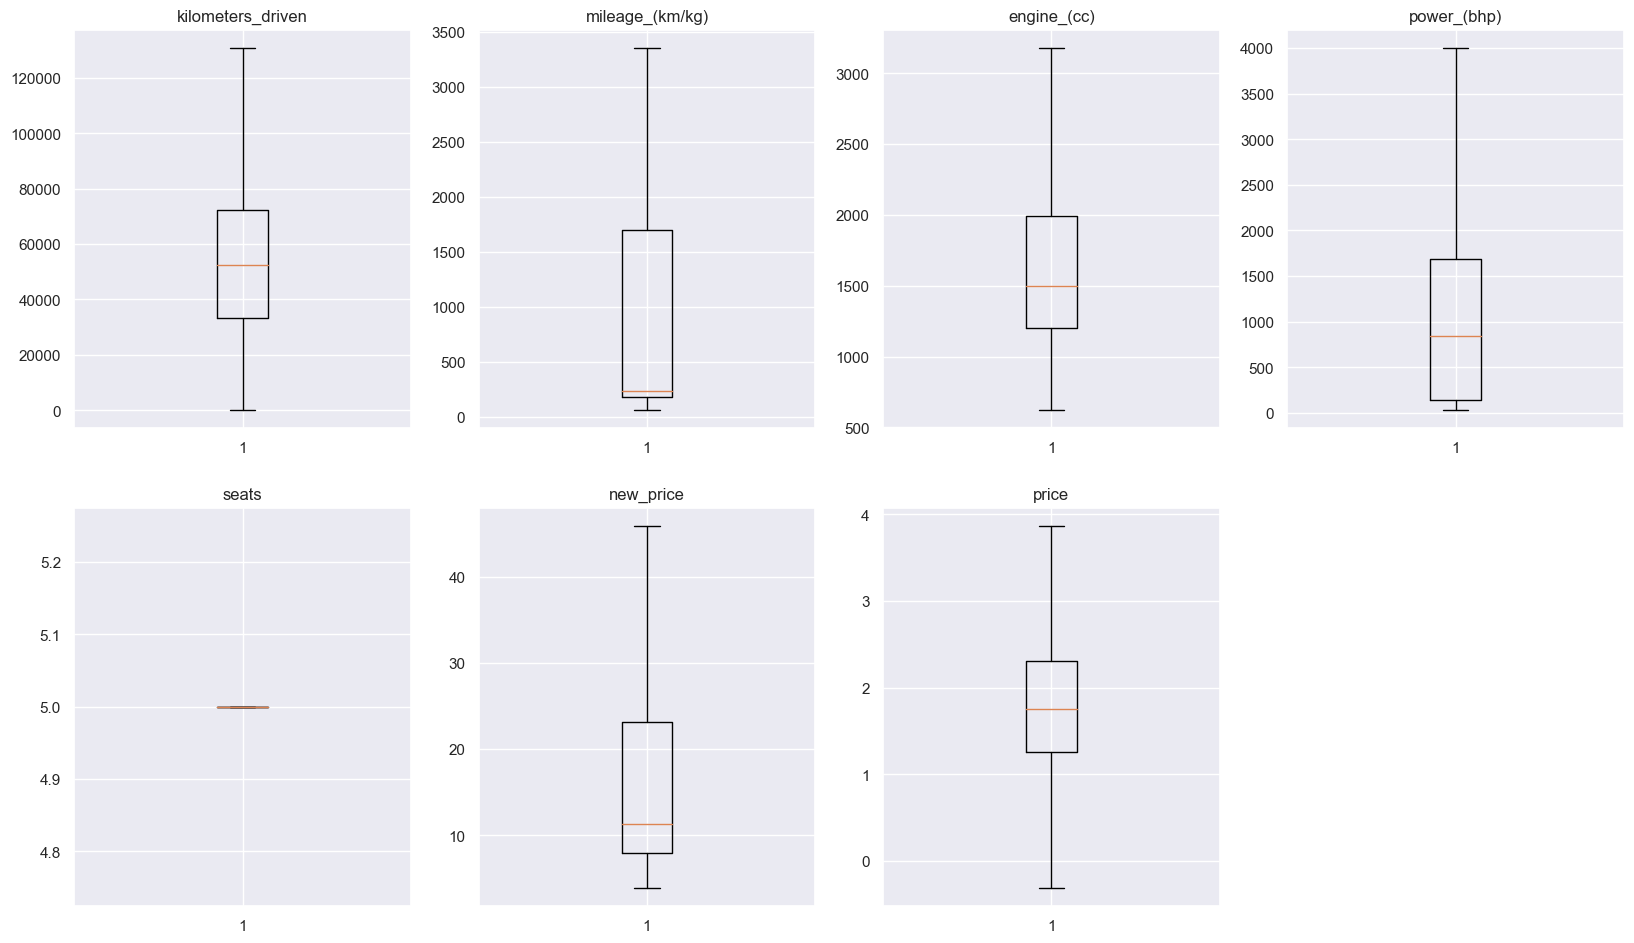

In [151]:
# Viewing the boxplots after outliers have been treated

plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    #plt.tight_layout()
    plt.title(variable)

plt.show()

In [152]:
# To obtain the numerical data type

my_numeric_df = df.select_dtypes(exclude ='object')
my_numeric_df

,kilometers_driven,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,72000.0,266.0,998.0,4002.5,5,5.51000,0.559616
1,41000.0,1967.0,1582.0,1262.0,5,16.06000,2.525729
2,46000.0,182.0,1199.0,887.0,5,8.61000,1.504077
3,87000.0,2077.0,1248.0,4002.5,5,11.27000,1.791759
4,40670.0,152.0,1968.0,1408.0,5,45.94125,2.875822
...,...,...,...,...,...,...,...
6014,27365.0,284.0,1248.0,74.0,5,7.88000,1.558145
6015,100000.0,244.0,1120.0,71.0,5,8.23000,1.386294
6016,55000.0,140.0,2498.0,112.0,5,11.67000,1.064711
6017,46000.0,189.0,998.0,671.0,5,5.51000,0.974560


In [153]:
# To obtain all the datatypes that are objects

my_object_df = df.select_dtypes(include = 'object')
my_object_df

,location,year,fuel_type,transmission,owner_type
0,Mumbai,2010,CNG,Manual,First
1,Pune,2015,Diesel,Manual,First
2,Chennai,2011,Petrol,Manual,First
3,Chennai,2012,Diesel,Manual,First
4,Coimbatore,2013,Diesel,Automatic,Second
...,...,...,...,...,...
6014,Delhi,2014,Diesel,Manual,First
6015,Jaipur,2015,Diesel,Manual,First
6016,Jaipur,2012,Diesel,Manual,Second
6017,Kolkata,2013,Petrol,Manual,First


### LInear Model Building

#### 1. The aim is to predict the price of the used cars.

#### 2. We have to encode categorical features, before we proceed to build a model.

#### 3. In order to build the model, we split the datasets into train and test data. 

#### 4. We will build a linear regression model using the train data and then check it's performance.

### Select Features and Target

In [155]:
X = df.drop("price", axis = 1)
y = df["price"]

### Creating dummy variables

In [156]:
X = pd.get_dummies(X, drop_first=True)

In [157]:
X.shape

(5872, 44)

In [158]:
X

,kilometers_driven,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_Manual,owner_type_Fourth & Above,owner_type_Second,owner_type_Third
0,72000.0,266.0,998.0,4002.5,5,5.51000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,41000.0,1967.0,1582.0,1262.0,5,16.06000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,46000.0,182.0,1199.0,887.0,5,8.61000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,87000.0,2077.0,1248.0,4002.5,5,11.27000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,40670.0,152.0,1968.0,1408.0,5,45.94125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365.0,284.0,1248.0,74.0,5,7.88000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
6015,100000.0,244.0,1120.0,71.0,5,8.23000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6016,55000.0,140.0,2498.0,112.0,5,11.67000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6017,46000.0,189.0,998.0,671.0,5,5.51000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


### Splitting datasets into train and test

In [161]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0,
                                                   test_size = 0.2)

In [162]:
x_train.shape

(4697, 44)

In [163]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4697
Number of rows in test data = 1175


### Data Normalization

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
scaler = MinMaxScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

#### Build Linear Regression Model

In [167]:
lin_reg = LinearRegression()

lin_reg.fit(x_train_sc, y_train)

LinearRegression()

In [168]:
# The coefficients obtained from the model

lin_reg.coef_

array([-2.79087407e-01, -2.14216980e-02,  1.09450557e+00,  6.31230494e-02,
       -3.10862447e-14,  1.23056418e+00,  1.27373541e-01,  1.71380677e-02,
        8.90656014e-02, -8.32498622e-02,  9.17368749e-02, -6.52034987e-02,
       -3.84851635e-02, -2.49330034e-01, -6.67786785e-02, -5.38565847e-02,
       -9.03452585e-03,  1.36563434e-01, -5.99621755e-02,  9.94907560e-02,
        1.66545698e-01,  2.34336094e-01,  1.00815597e-01,  4.76733225e-01,
        5.18911111e-01,  6.16364035e-01,  7.93595778e-01,  9.19376199e-01,
        1.04349082e+00,  1.18771059e+00,  1.31146111e+00,  1.42614547e+00,
        1.53586673e+00,  1.64456881e+00,  1.74102838e+00,  1.83477014e+00,
        1.77232429e+00,  1.55479240e-01, -2.05485343e-03,  4.14918676e-02,
       -1.43376366e-01,  1.11956039e-01, -6.38854269e-02, -9.75520895e-02])

In [169]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Check Model Performance on Train set

In [170]:
model_train_pf = model_performance_regression(lin_reg, x_train_sc, y_train)

In [171]:
model_train_pf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.252481,0.187124,0.911493,0.910656


#### OBSERVATIONS

#### The model has 91% R-squared score in predicting the target which is price

#### The model has RMSE and MAE error < 1

### Check Model Performance on Test set

In [172]:
model_test_pf = model_performance_regression(lin_reg, x_test_sc, y_test)

In [173]:
model_test_pf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.242314,0.185734,0.919596,0.916465


In [176]:
print("Training Accuracy: {:.3f}".format(lin_reg.score(x_train_sc, y_train)))
print("Test Accuracy: {:.3f}".format(lin_reg.score(x_test_sc, y_test)))

Training Accuracy: 0.911
Test Accuracy: 0.920


In [178]:
pred = lin_reg.predict(x_test_sc)
r2_score(y_test,pred)

0.9195956012750339

### Ridge Regression

In [179]:
ridge = Ridge(alpha = 2.0)

ridge.fit(x_train_sc, y_train)

Ridge(alpha=2.0)

In [180]:
ridge_train_pf = model_performance_regression(ridge, x_train_sc, y_train)
ridge_train_pf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.254049,0.188599,0.91039,0.909543


In [181]:
ridge_test_pf = model_performance_regression(ridge, x_test_sc, y_test)
ridge_test_pf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.243066,0.186764,0.919096,0.915946


### Lasso Regression

In [182]:
lasso = Lasso(alpha = 0.01)

lasso.fit(x_train_sc, y_train)

Lasso(alpha=0.01)

In [183]:
lasso_train_pf = model_performance_regression(lasso, x_train_sc, y_train)
lasso_train_pf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.348908,0.26006,0.830978,0.82938


In [184]:
lasso_test_pf = model_performance_regression(lasso, x_test_sc, y_test)
lasso_test_pf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.339803,0.256552,0.841883,0.835726


In [185]:
lasso.coef_

array([-0.56936617,  0.        ,  0.70395837,  0.11292727,  0.        ,
        1.20181565,  0.        , -0.        ,  0.14948972, -0.        ,
        0.        , -0.        ,  0.02343615, -0.16928456, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.07484048, -0.        , -0.00180935, -0.        ,  0.        ,
        0.02604412,  0.13603919,  0.22686627,  0.30903237,  0.35282882,
        0.33965707,  0.        ,  0.28424729, -0.        , -0.0020593 ,
       -0.20777372, -0.        , -0.12732968, -0.        ])

### Forward Feature Selection Using SequentialFeatureSelector

In [186]:
# import the SequentialFeatureSelector from the feature_selection module

from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator = lin_reg, 
                                k_features = x_train.shape[1],
                               n_jobs = -1,
                               verbose = 2)

sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    4.5s finished

[2023-02-06 04:47:22] Features: 1/44 -- score: 0.6034327991577406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished

[2023-02-06 04:47:22] Features: 2/44 -- score: 0.662324971200346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  42 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished

[2023-02-06 04:47:23] Features: 3/44 -- score: 0.715578423934784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.0s r

[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2023-02-06 04:47:32] Features: 31/44 -- score: 0.9064071347332903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2023-02-06 04:47:32] Features: 32/44 -- score: 0.9065382487558482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2023-02-06 04:47:33] Features: 33/44 -- score: 0.90660945865054[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(44, 44),
                          n_jobs=-1, scoring='r2', verbose=2)

### Plot the performance with addition of each feature

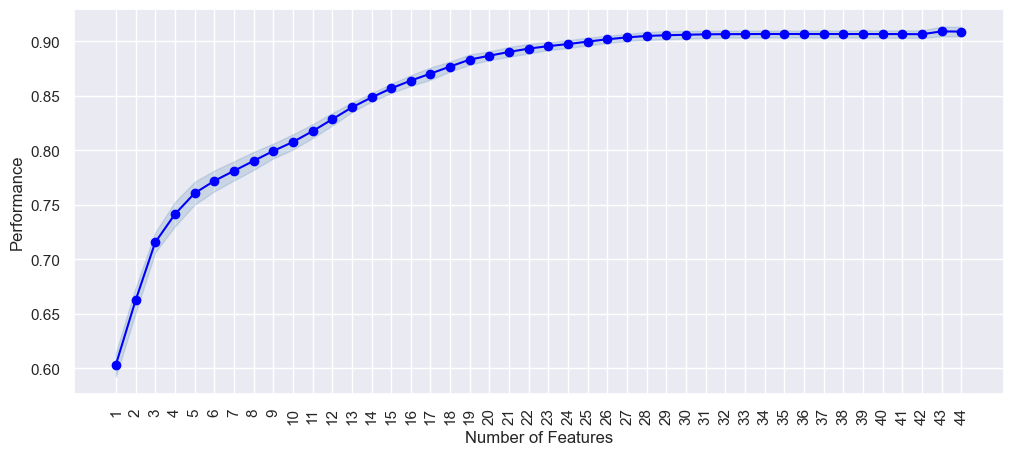

In [187]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize = (12, 5))
plt.xticks(rotation = 90)
plt.show()

In [188]:
sfs = SequentialFeatureSelector(estimator=lin_reg,
                               k_features=25,
                               n_jobs=-1,
                               verbose=2)
sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  44 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.1s finished

[2023-02-06 04:49:39] Features: 1/25 -- score: 0.6034327991577406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  43 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished

[2023-02-06 04:49:39] Features: 2/25 -- score: 0.662324971200346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished

[2023-02-06 04:49:40] Features: 3/25 -- score: 0.715578423934784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 |

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(25, 25),
                          n_jobs=-1, scoring='r2', verbose=2)

In [189]:
 # Index of the feature

feat_cols = list(sfs.k_feature_idx_)

In [191]:
# Select the important features in training and test sets

x_train_new = x_train[x_train.columns[feat_cols]]
x_test_new = x_test[x_train.columns[feat_cols]]

In [192]:
# To normalize the new train and test sets


scaler_new = MinMaxScaler() #instance
x_train_new_sc = scaler_new.fit_transform(x_train_new)
x_test_new_sc = scaler_new.transform(x_test_new)

### Re-build the models with the new features

In [193]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train_new_sc, y_train)

LinearRegression()

In [196]:
model_performance_regression(lin_reg2, x_test_new_sc, y_test)

,RMSE,MAE,R-squared,Adj. R-squared
0,0.251268,0.19258,0.913544,0.911663


### My model was able to predict 91% of the variables in relation to the target variable price